In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import math

import numpy as np
import tensorflow as tf

#for reproducible results
import random

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasSGDOptimizer
from tensorflow_privacy.privacy.optimizers import dp_optimizer
import tensorflow_privacy

#for logging
import sys
import logging

In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%load_ext tensorboard
import datetime
#for reproducible results
import random

In [3]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## EDA

In [5]:
data_dir = "/ssd003/projects/pets/datasets/home_credit"
# home_credit_train_df = pd.read_csv(f"{data_dir}/home_credit_train.csv")
# credit_bureau_train_df = pd.read_csv(f"{data_dir}/credit_bureau_train.csv")
data_df = pd.read_csv(f"{data_dir}/train.csv")

In [10]:
len(home_credit_train_df.columns)

99

In [11]:
len(credit_bureau_train_df.columns)

6

In [9]:
len(train_df.columns)

105

In [13]:
len(train_df)

307511

In [38]:
data_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target
0,-0.577538,0.142129,-0.478095,-0.166149,-0.507465,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-5.176655e-01,1
1,-0.577538,0.426792,1.725450,0.592677,1.600698,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00,0
2,-0.577538,-0.427196,-1.152888,-1.404676,-1.092389,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00,0
3,-0.577538,-0.142533,-0.711430,0.177869,-0.653696,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16,0
4,-0.577538,-0.199466,-0.213734,-0.361755,-0.068772,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00,0


In [16]:
data_df['target'].value_counts()

0    282686
1     24825
Name: target, dtype: int64

In [17]:
24825 / (24825 + 282686)

0.08072881945686496

In [18]:
data_df.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'target'],
      dtype='object', length=105)

In [24]:
types = pd.DataFrame(data_df.dtypes)

In [50]:
types.head(55)

,0
CNT_CHILDREN,float64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64
AMT_GOODS_PRICE,float64
REGION_POPULATION_RELATIVE,float64
DAYS_BIRTH,float64
DAYS_EMPLOYED,float64
DAYS_REGISTRATION,float64
DAYS_ID_PUBLISH,float64


### Checking for missing data

In [33]:
np.sum(np.sum(data_df.isna()))

0

In [34]:
data_df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target
0,-0.577538,0.142129,-0.478095,-0.166149,-0.507465,-0.149452,1.506880,-0.456215,0.379837,0.579154,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-5.176655e-01,1
1,-0.577538,0.426792,1.725450,0.592677,1.600698,-1.252750,-0.166821,-0.460115,1.078697,1.790855,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00,0
2,-0.577538,-0.427196,-1.152888,-1.404676,-1.092389,-0.783451,-0.689509,-0.453299,0.206116,0.306869,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00,0
3,-0.577538,-0.142533,-0.711430,0.177869,-0.653696,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,...,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16,0
4,-0.577538,-0.199466,-0.213734,-0.361755,-0.068772,0.563570,-0.892535,-0.473210,0.191639,-0.307263,...,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00,0


In [35]:
data_df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,...,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000
mean,-3.225633e-17,-1.220299e-17,-3.880695e-17,4.621251e-17,6.585514e-16,3.335850e-16,3.350407e-17,4.311627e-17,-6.469751e-18,6.757424e-17,...,-7.625064e-18,-1.940925e-18,6.053839e-18,5.753457e-17,2.768129e-17,-5.857435e-17,1.187661e-17,-1.688490e-17,-3.288482e-16,0.080729
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.272419
min,-5.775378e-01,-6.036870e-01,-1.376496e+00,-1.758940e+00,-1.348293e+00,-1.487798e+00,-2.106335e+00,-5.784940e-01,-5.588007e+00,-2.784328e+00,...,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,-3.138730e-01,-3.594746e-01,-1.092866e+00,0.000000
25%,-5.775378e-01,-2.374210e-01,-8.174760e-01,-7.303015e-01,-8.121132e-01,-7.853308e-01,-8.352476e-01,-4.712426e-01,-7.077673e-01,-8.644204e-01,...,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,-3.138730e-01,-3.594746e-01,-5.176655e-01,0.000000
50%,-5.775378e-01,-9.129414e-02,-2.124151e-01,-1.521775e-01,-2.393752e-01,-1.459095e-01,6.576450e-02,-4.602923e-01,1.368540e-01,-1.721143e-01,...,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,-3.138730e-01,-3.594746e-01,-3.831603e-16,0.000000
75%,8.072731e-01,1.421293e-01,5.208178e-01,5.166083e-01,3.821064e-01,5.635704e-01,8.304332e-01,-4.537519e-01,8.447974e-01,8.441512e-01,...,-2.440195e-02,-2.252901e-02,-1.830463e-02,-8.210023e-02,-6.795715e-02,-1.805048e-01,0.000000e+00,-7.516682e-17,6.327349e-01,0.000000
max,2.573387e+01,4.927034e+02,8.574059e+00,1.593252e+01,9.509356e+00,3.733564e+00,1.958761e+00,2.133617e+00,1.415353e+00,1.983641e+00,...,4.098034e+01,4.438721e+01,5.463098e+01,5.121092e+01,8.730290e+01,4.184385e+01,3.137918e+01,3.530567e+02,1.328714e+01,1.000000


(array([2.7649e+05, 3.0466e+04, 5.1300e+02, 2.8000e+01, 4.0000e+00,
        3.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.57753784,  2.05360303,  4.6847439 ,  7.31588478,  9.94702565,
        12.57816652, 15.20930739, 17.84044826, 20.47158914, 23.10273001,
        25.73387088]),
 <BarContainer object of 10 artists>)

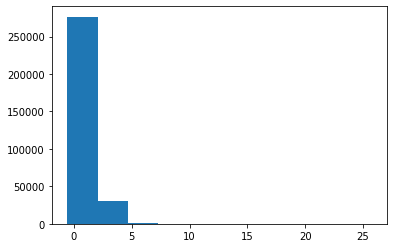

In [36]:
plt.hist(data_df['CNT_CHILDREN'])

(array([3.0751e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -0.35947456,  34.98214314,  70.32376084, 105.66537854,
        141.00699624, 176.34861394, 211.69023164, 247.03184934,
        282.37346704, 317.71508474, 353.05670244]),
 <BarContainer object of 10 artists>)

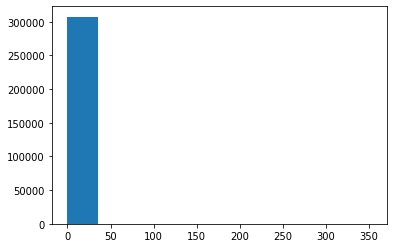

In [41]:
plt.hist(data_df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [43]:
data_df['FLAG_DOCUMENT_3'].value_counts()

 0.639065    218340
-1.564786     89171
Name: FLAG_DOCUMENT_3, dtype: int64

In [51]:
data_df['ELEVATORS_MODE'].value_counts()

-9.719244e-14    163891
-8.241475e-01     89498
 6.760339e-02     11629
 9.582479e-01      9675
 1.849999e+00      6379
 5.123725e-01      5734
-3.782721e-01      4876
 1.404123e+00      3962
 2.740643e+00      2887
 2.295874e+00      2135
 3.632394e+00      1554
 3.186519e+00      1308
 4.524145e+00      1094
 4.078270e+00       628
 5.414790e+00       491
 6.306541e+00       447
 4.968914e+00       253
 5.860665e+00       226
 7.197185e+00       219
 1.023976e+01       144
 8.088936e+00       137
 6.752416e+00        99
 9.871331e+00        87
 8.980687e+00        66
 7.643061e+00        38
 8.534812e+00        34
 9.425456e+00        20
Name: ELEVATORS_MODE, dtype: int64

### Preparing the dataset to train

In [6]:
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [7]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('target'))
val_labels = np.array(val_df.pop('target'))
test_labels = np.array(test_df.pop('target'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

Normalize the data

In [8]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

### Oversampling

In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_train_oversampled, y_oversampled = oversample.fit_resample(train_features, train_labels)

### Define the model metrics

In [10]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    # underfitting. 
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
    ])
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(40, input_shape=(train_features.shape[-1],), activation='relu'),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(60, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(20, activation='relu'),
#         tf.keras.layers.Dropout(0.3),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(80, input_shape=(train_features.shape[-1],), activation='relu'),
#         tf.keras.layers.Dropout(0.4),
#         tf.keras.layers.Dense(80, activation='relu'),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(40, activation='relu'),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [11]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

In [12]:
EPOCHS = 100
BATCH_SIZE = 2048
# BATCH_SIZE = 250

early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_prc', 
    monitor="val_auc",
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

### Check training history

In [13]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

### Evaluate metrics
You can use a confusion matrix to summarize the actual vs. predicted labels, where the X axis is the predicted label and the Y axis is the actual label. 

In [14]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

### ROC

In [15]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100.5])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

### AUPRC

In [16]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [17]:
resampled_features = X_train_oversampled
resampled_labels = y_oversampled

### Vanilla non-DP model

In [85]:
# resampled_model = make_model()
# resampled_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss=keras.losses.BinaryCrossentropy(),
#     metrics=METRICS)

# # Reset the bias to zero, since this dataset is balanced.
# output_layer = resampled_model.layers[-1] 
# output_layer.bias.assign([0])
# # resampled_steps_per_epoch = 20

# resampled_history = resampled_model.fit(
#     resampled_features, resampled_labels,
#     epochs=EPOCHS,
# #     steps_per_epoch=resampled_steps_per_epoch,
#     callbacks=[early_stopping],
#     validation_data=(val_features, val_labels))

Epoch 1/100
 1034/14134 [=>............................] - ETA: 1:01 - loss: 0.6597 - tp: 10690.0000 - fp: 6643.0000 - tn: 9886.0000 - fn: 5869.0000 - accuracy: 0.6219 - precision: 0.6167 - recall: 0.6456 - auc: 0.6647 - prc: 0.6280

KeyboardInterrupt: 

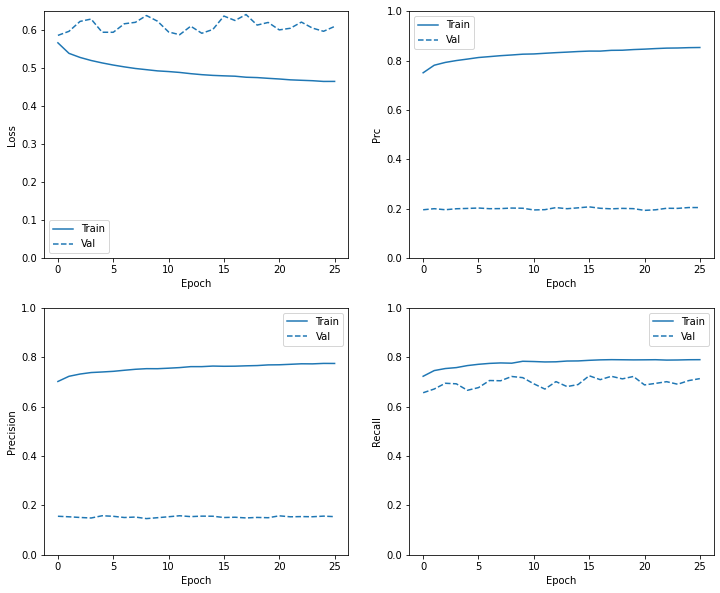

In [81]:
# plot_metrics(resampled_history)

In [45]:
# resampled_model = make_model()
# resampled_model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss=keras.losses.BinaryCrossentropy(),
#     metrics=METRICS)

# # Reset the bias to zero, since this dataset is balanced.
# output_layer = resampled_model.layers[-1] 
# output_layer.bias.assign([0])

# resampled_history = resampled_model.fit(
#     resampled_features, resampled_labels,
#     # These are not real epochs
#     steps_per_epoch=20,
#     epochs=10*EPOCHS,
#     callbacks=[early_stopping],
#     validation_data=(val_features, val_labels))

Epoch 1/1000
20/20 [==============================] - 10s 444ms/step - loss: 0.6925 - tp: 105890.0000 - fp: 102409.0000 - tn: 180277.0000 - fn: 125191.0000 - accuracy: 0.5570 - precision: 0.5084 - recall: 0.4582 - auc: 0.5834 - prc: 0.4872 - val_loss: 0.6270 - val_tp: 2749.0000 - val_fp: 16484.0000 - val_tn: 40070.0000 - val_fn: 2200.0000 - val_accuracy: 0.6962 - val_precision: 0.1429 - val_recall: 0.5555 - val_auc: 0.6774 - val_prc: 0.1610
Epoch 2/1000
20/20 [==============================] - 7s 354ms/step - loss: 0.6567 - tp: 129299.0000 - fp: 78773.0000 - tn: 147359.0000 - fn: 96833.0000 - accuracy: 0.6117 - precision: 0.6214 - recall: 0.5718 - auc: 0.6564 - prc: 0.6306 - val_loss: 0.6132 - val_tp: 3115.0000 - val_fp: 18612.0000 - val_tn: 37942.0000 - val_fn: 1834.0000 - val_accuracy: 0.6676 - val_precision: 0.1434 - val_recall: 0.6294 - val_auc: 0.7032 - val_prc: 0.1811
Epoch 3/1000
20/20 [==============================] - 7s 352ms/step - loss: 0.6337 - tp: 143343.0000 - fp: 76292.

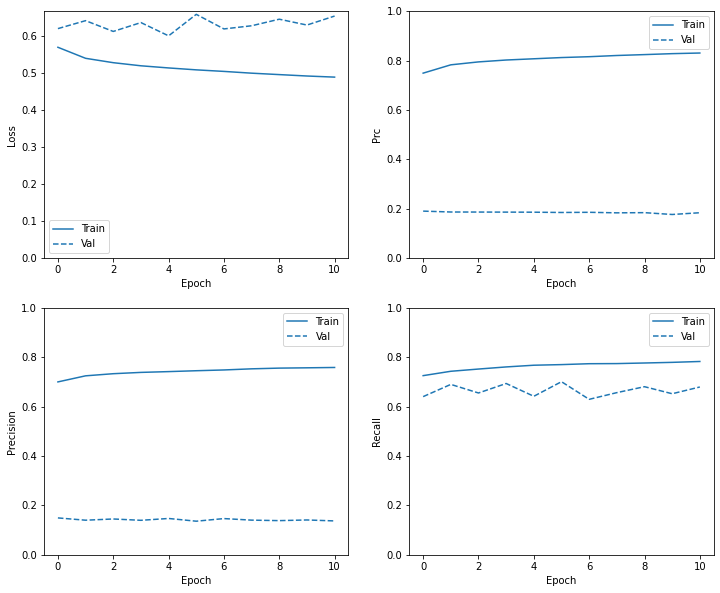

In [61]:
# plot_metrics(resampled_history)

### Performance

In [82]:
# train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
# test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

In [18]:
def evaluate_models(keras_model, train_features, train_labels, test_features, test_labels, BATCH_SIZE):
    train_predictions = keras_model.predict(train_features, batch_size=BATCH_SIZE)
    test_predictions = keras_model.predict(test_features, batch_size=BATCH_SIZE)
    test_prediction_results = keras_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
    for name, value in zip(keras_model.metrics_names, test_prediction_results):
        print(name, ": ", value)
    print()
    plot_cm(test_labels, test_predictions)
    print()
    print("Plot ROC")
    plot_roc("Train Resampled", train_labels, train_predictions, color=colors[2])
    plot_roc("Test Resampled", test_labels, test_predictions, color=colors[2], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("ROC")
    plt.show()
    
    print()
    print("Plot Precision-Recall Curve")
    plot_prc("Train Resampled", train_labels, train_predictions, color=colors[2])
    plot_prc("Test Resampled", test_labels, test_predictions, color=colors[2], linestyle='--')
    plt.legend(loc='lower right')
    plt.title("Precision Recall Curve")
    plt.show()
    

loss :  0.5734538435935974
tp :  3308.0
fp :  18914.0
tn :  37640.0
fn :  1641.0
accuracy :  0.6657886505126953
precision :  0.14886148273944855
recall :  0.6684178709983826
auc :  0.7321951389312744
prc :  0.210875004529953

Legitimate Transactions Detected (True Negatives):  37640
Legitimate Transactions Incorrectly Detected (False Positives):  18914
Fraudulent Transactions Missed (False Negatives):  1641
Fraudulent Transactions Detected (True Positives):  3308
Total Fraudulent Transactions:  4949


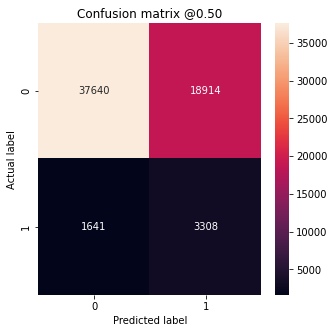

In [76]:
# resampled_results = resampled_model.evaluate(test_features, test_labels,
#                                              batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(resampled_model.metrics_names, resampled_results):
#     print(name, ': ', value)
# print()

# plot_cm(test_labels, test_predictions_resampled)

#### ROC

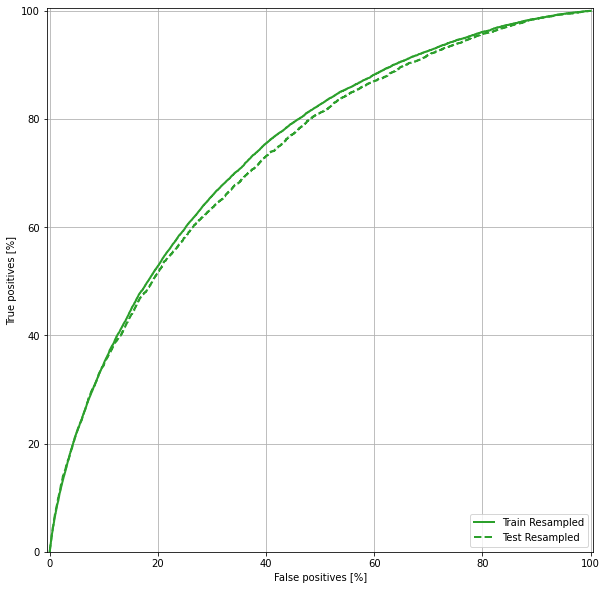

In [77]:
# plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
# plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
# # plt.legend(loc='lower right')

### Plot the AUPRC

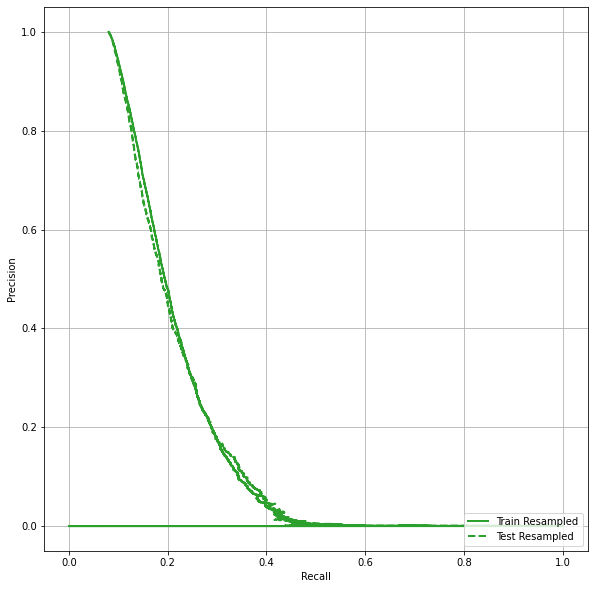

In [78]:
# plot_prc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
# plot_prc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
# plt.legend(loc='lower right')

## DP-SGD

In [19]:
def compute_epsilon(steps, training_size, noise_multiplier, batch_size):
  """Computes epsilon value for given hyperparameters."""
  if noise_multiplier == 0.0:
    return float('inf')

  #rule of thumb for delta is to set it to less than the inverse of the training data size
  #so I opted for it to equal to 1.1*training size
  training_delta = 1 / (training_size *1.1) 

  orders = np.linspace(1+math.log(1./training_delta)/10, 1+math.log(1./training_delta)/1, num=100)
  #if you want epsilon between 1-10 and your delta is fixed
  # your orders must cover the range between 1+ln(1/delta)/10 and 1+ln(1/delta)/1

  sampling_probability = batch_size / training_size
  rdp = compute_rdp(q=sampling_probability,
                    noise_multiplier=noise_multiplier,
                    steps=steps,
                    orders=orders)

  return get_privacy_spent(orders, rdp, target_delta=training_delta)[0], training_delta

In [20]:
def train(dpsgd, batch_size, microbatches, l2_norm_clip, noise_multiplier, learning_rate, epochs, 
          resampled_features, resampled_labels, print_output = True, verbose = 0):
    #logging.set_verbosity(logging.INFO)
    if dpsgd and batch_size % microbatches != 0:
        raise ValueError('Number of microbatches should divide evenly batch_size')

    # Define a sequential Keras model
    resampled_dp_model = make_model()

    # Reset the bias to zero, since this dataset is balanced.
    #output_layer = resampled_dp_model.layers[-1] 
    #output_layer.bias.assign([0])

    if dpsgd:
        optimizer = DPKerasSGDOptimizer(
            l2_norm_clip=l2_norm_clip,
            noise_multiplier=noise_multiplier,
            num_microbatches=microbatches,
            learning_rate=learning_rate)
        # Compute vector of per-example loss rather than its mean over a minibatch.
        loss = tf.keras.losses.BinaryCrossentropy(reduction=tf.losses.Reduction.NONE)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        loss = tf.keras.losses.BinaryCrossentropy()

    # Compile model with Keras
    resampled_dp_model.compile(optimizer=optimizer, loss=loss, metrics=METRICS)

    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    training_size = resampled_features.shape[0]

    # Train model with Keras
    resampled_dp_history = resampled_dp_model.fit(
        resampled_features, resampled_labels,
        epochs=epochs,
#         steps_per_epoch=resampled_steps_per_epoch,
        callbacks=[early_stopping, tensorboard_callback], #monitor='val_prc', higher = better
        validation_data=(val_features, val_labels),
        verbose = verbose)
    
    score_train = resampled_dp_model.evaluate(resampled_features, resampled_labels, verbose=verbose)
    score_val = resampled_dp_model.evaluate(val_features, val_labels, verbose=verbose)
    score_test = resampled_dp_model.evaluate(test_features, test_labels, verbose=verbose)

    weights = resampled_dp_model.get_weights()

    # Compute the privacy budget expended.
    if dpsgd:
        eps, delta = compute_epsilon(epochs * training_size // batch_size, training_size=training_size, 
                                     noise_multiplier=noise_multiplier, batch_size=batch_size)
        if print_output:
            print('For delta=%.4f, the current epsilon is: %.2f' % (delta, eps))
    else:
        if print_output:
            print('Trained with vanilla non-private SGD optimizer')

    if print_output:
        print("Training Result")
        for name, value in zip(resampled_dp_model.metrics_names, score_train):
            print(name, ': ', value)
        print()
        print("Validation Result")
        for name, value in zip(resampled_dp_model.metrics_names, score_val):
            print(name, ': ', value)
        print()
        print("Testing Result")
        for name, value in zip(resampled_dp_model.metrics_names, score_test):
            print(name, ': ', value)
        print()     

    if dpsgd:
        return resampled_dp_model, score_train, score_val, score_test, eps, delta, weights, resampled_dp_history
    
    return resampled_dp_model, score_train, score_val, score_test, weights, resampled_dp_history

### DP-SGD model

In [103]:
resampled_dp_model, score_train, score_val, score_test, eps, delta, weights, resampled_dp_history = train(dpsgd=True, batch_size=BATCH_SIZE, microbatches=1, l2_norm_clip=1.0, 
      noise_multiplier=1.0, learning_rate=0.001, epochs=EPOCHS, 
      resampled_features=resampled_features, resampled_labels=resampled_labels,print_output=True, verbose = 1)

Epoch 1/100
14134/14134 [==============================] - 90s 6ms/step - loss: 0.6908 - tp: 186864.0000 - fp: 127239.0000 - tn: 166515.0000 - fn: 107646.0000 - accuracy: 0.6007 - precision: 0.5949 - recall: 0.6345 - auc: 0.6346 - prc: 0.6050 - val_loss: 0.6510 - val_tp: 2828.0000 - val_fp: 20066.0000 - val_tn: 25094.0000 - val_fn: 1214.0000 - val_accuracy: 0.5675 - val_precision: 0.1235 - val_recall: 0.6997 - val_auc: 0.6793 - val_prc: 0.1618
Epoch 2/100
14134/14134 [==============================] - 85s 6ms/step - loss: 0.6513 - tp: 160988.0000 - fp: 104006.0000 - tn: 122126.0000 - fn: 65144.0000 - accuracy: 0.6260 - precision: 0.6075 - recall: 0.7119 - auc: 0.6709 - prc: 0.6379 - val_loss: 0.5939 - val_tp: 2517.0000 - val_fp: 15781.0000 - val_tn: 29379.0000 - val_fn: 1525.0000 - val_accuracy: 0.6483 - val_precision: 0.1376 - val_recall: 0.6227 - val_auc: 0.6862 - val_prc: 0.1681
Epoch 3/100
14134/14134 [==============================] - 85s 6ms/step - loss: 0.6463 - tp: 160409.0000 

loss :  0.6028777956962585
tp :  3352.0
fp :  21254.0
tn :  35300.0
fn :  1597.0
accuracy :  0.6284571290016174
precision :  0.13622693717479706
recall :  0.6773085594177246
auc :  0.7035040259361267
prc :  0.17498354613780975



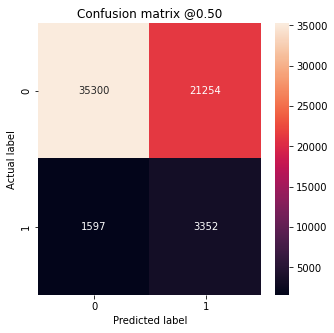

Legitimate Transactions Detected (True Negatives):  35300
Legitimate Transactions Incorrectly Detected (False Positives):  21254
Fraudulent Transactions Missed (False Negatives):  1597
Fraudulent Transactions Detected (True Positives):  3352
Total Fraudulent Transactions:  4949

Plot ROC


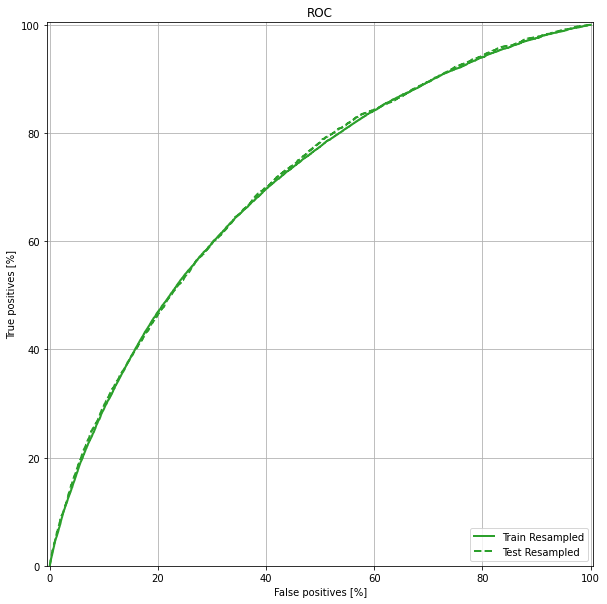


Plot Precision-Recall Curve


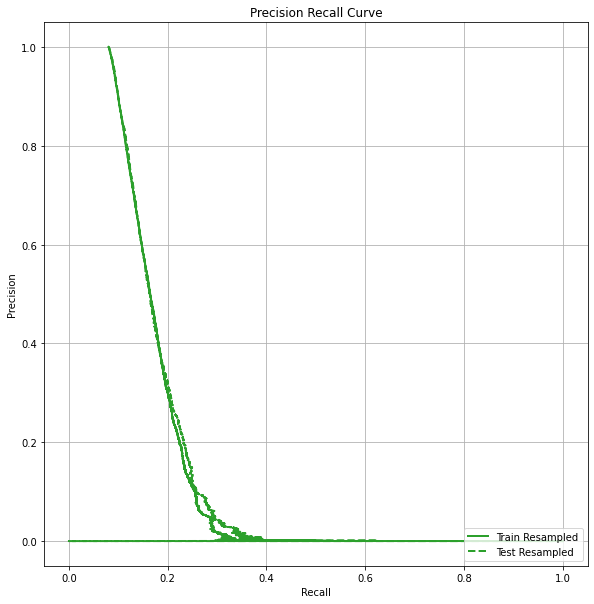

In [109]:
evaluate_models(resampled_dp_model, train_features, train_labels, test_features, test_labels, BATCH_SIZE)

In [94]:
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

### non-DP Model

In [110]:
resampled_model, score_train, score_val, score_test, eps, delta, weights, resampled_history = train(dpsgd=True, batch_size=BATCH_SIZE, microbatches=1, l2_norm_clip=1.0, 
      noise_multiplier=1.0, learning_rate=0.001, epochs=EPOCHS, 
      resampled_features=resampled_features, resampled_labels=resampled_labels,print_output=True, verbose = 1)

Epoch 1/100
14134/14134 [==============================] - 82s 6ms/step - loss: 0.7291 - tp: 99827.0000 - fp: 86920.0000 - tn: 195766.0000 - fn: 131254.0000 - accuracy: 0.5753 - precision: 0.5346 - recall: 0.4320 - auc: 0.5945 - prc: 0.5368 - val_loss: 0.6150 - val_tp: 2201.0000 - val_fp: 13109.0000 - val_tn: 32051.0000 - val_fn: 1841.0000 - val_accuracy: 0.6962 - val_precision: 0.1438 - val_recall: 0.5445 - val_auc: 0.6759 - val_prc: 0.1569
Epoch 2/100
14134/14134 [==============================] - 77s 5ms/step - loss: 0.6612 - tp: 116706.0000 - fp: 69904.0000 - tn: 156228.0000 - fn: 109426.0000 - accuracy: 0.6035 - precision: 0.6254 - recall: 0.5161 - auc: 0.6514 - prc: 0.6282 - val_loss: 0.5931 - val_tp: 2113.0000 - val_fp: 11242.0000 - val_tn: 33918.0000 - val_fn: 1929.0000 - val_accuracy: 0.7323 - val_precision: 0.1582 - val_recall: 0.5228 - val_auc: 0.6945 - val_prc: 0.1706
Epoch 3/100
14134/14134 [==============================] - 77s 5ms/step - loss: 0.6545 - tp: 120733.0000 - 

loss :  0.6174559593200684
tp :  3294.0
fp :  19841.0
tn :  36713.0
fn :  1655.0
accuracy :  0.6504886150360107
precision :  0.1423816680908203
recall :  0.6655890345573425
auc :  0.7114958167076111
prc :  0.18161164224147797



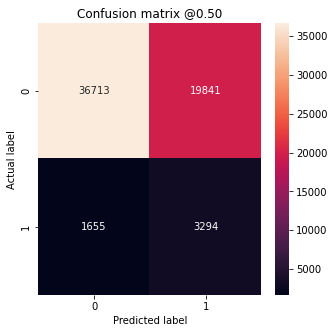

Legitimate Transactions Detected (True Negatives):  36713
Legitimate Transactions Incorrectly Detected (False Positives):  19841
Fraudulent Transactions Missed (False Negatives):  1655
Fraudulent Transactions Detected (True Positives):  3294
Total Fraudulent Transactions:  4949

Plot ROC


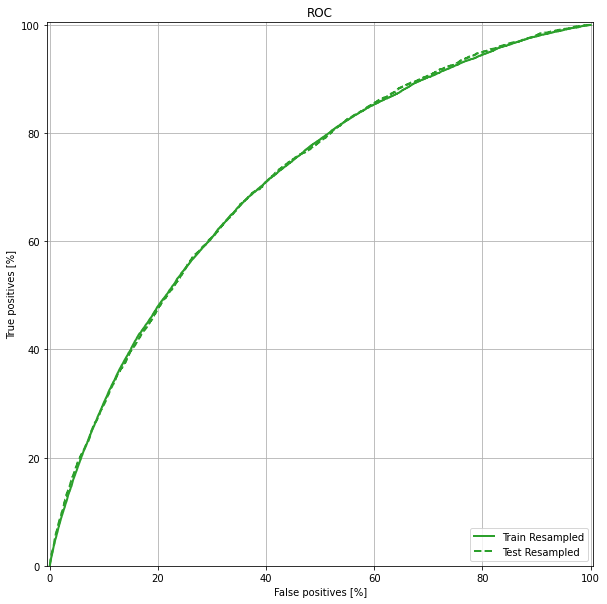


Plot Precision-Recall Curve


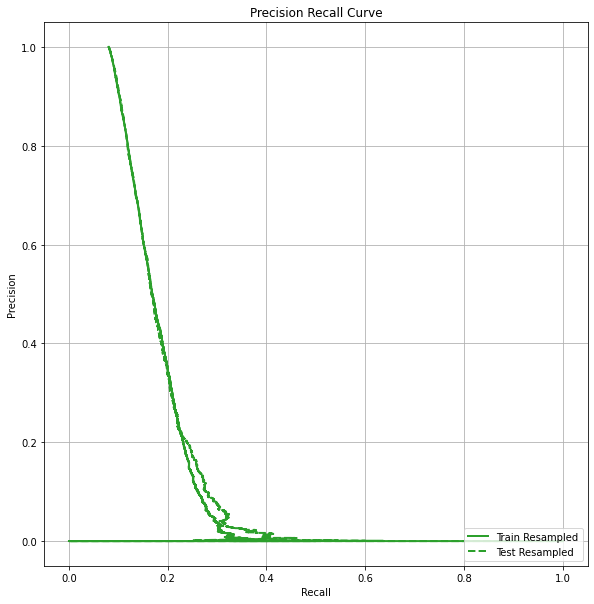

In [111]:
evaluate_models(resampled_model, train_features, train_labels, test_features, test_labels, BATCH_SIZE)

In [ ]:
%tensorboard --logdir logs/fit

### Hyperparameter Tuning

In [21]:
def train_hp_tuning(dpsgd, batch_sizes, microbatches_list, l2_norm_clips, 
                    noise_multipliers, learning_rate, epochs,  model_dir=None, print_output = False, verbose = 0):
    
    table_outputs = []
    for batch_size in batch_sizes:
        for microbatches in microbatches_list:
            for l2_norm_clip in l2_norm_clips:
                for noise_multiplier in noise_multipliers:

                    _, score_train, score_val, score_test, eps, delta, _, _ = train(dpsgd=dpsgd, 
                                        batch_size=batch_size, microbatches=microbatches, l2_norm_clip=l2_norm_clip,
                                        noise_multiplier=noise_multiplier, learning_rate=learning_rate, 
                                        epochs=epochs, resampled_features=resampled_features, resampled_labels=resampled_labels,
                                        print_output=print_output, verbose = verbose)
                    
                    table_outputs.append([learning_rate, noise_multiplier, l2_norm_clip, epochs, batch_size, microbatches,
                                        score_train[0], score_train[6],  score_train[7],  score_train[8], score_train[9], 
                                        score_val[0],  score_val[6],  score_val[7],  score_val[8],  score_val[9], 
                                        score_test[0], score_test[6], score_test[7], score_test[8], score_test[9], 
                                        eps, delta])

                
    df = pd.DataFrame(table_outputs, columns=['learning rate', 'noise multiplier', 'L2 norm clip',
                                                'Epochs', 'Batch size', 'Microbatches', 
                                              'Training loss', 'Training precision', 'Training recall', 'Training AUC', 'Training PRC', 
                                              'Validation loss', 'Validation precision', 'Validation recall', 'Validation AUC', 'Validation PRC', 
                                              'Test loss', 'Test precision', 'Test recall', 'Test AUC', 'Test PRC', 
                                              'Epsilon', 'Delta'])

    return df

In [ ]:
noise_multipliers = [1, 3, 5]
l2_norm_clips = [0.9, 1.0, 1.1]
batch_sizes = [1024, 2048]
microbatches_list = [1]

training_outputs = train_hp_tuning(dpsgd=True,  batch_sizes = batch_sizes,
                                   microbatches_list=microbatches_list,
                                   l2_norm_clips=l2_norm_clips, 
                                   noise_multipliers=noise_multipliers, 
                                    learning_rate=0.0005, epochs=100,  model_dir=None,
                                    print_output = False, verbose = 0)




In [ ]:
training_outputs.sort_values(by=['Validation PRC', 'Epsilon'], ascending=[False, True])
training_outputs

## Adversarial Test